# 6.3 실습 - 인공신경망 학습
## 6.3.2 성능 개선

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.chdir('C:/Users/Playdata/Documents/카카오톡 받은 파일')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.datasets import load_boston

# 데이터 불러오기
boston_df = pd.read_csv('./boston.csv')
# boston = load_boston()
# boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
# boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [4]:
boston_df.shape

(506, 15)

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터분할
y = boston_df['MEDV']
X = boston_df.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)
print('X_test.shape =' , X_test.shape)
print('y_test.shape =' , y_test.shape)

X_train.shape = (379, 14)
y_train.shape = (379,)
X_test.shape = (127, 14)
y_test.shape = (127,)


In [6]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=14, activation='relu'))
model.add(Dense(1, activation='relu'))

In [7]:
# 모델 컴파일
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 실행
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
38/38 [==============================] - 1s 1ms/step - loss: 613.4542 - mse: 613.4542
Epoch 2/50
38/38 [==============================] - 0s 1ms/step - loss: 613.4543 - mse: 613.4543
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 613.4544 - mse: 613.4544
Epoch 4/50
38/38 [==============================] - 0s 1ms/step - loss: 613.4543 - mse: 613.4543
Epoch 5/50
38/38 [==============================] - 0s 1ms/step - loss: 613.4544 - mse: 613.4543
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 613.4543 - mse: 613.4543
Epoch 7/50
38/38 [==============================] - 0s 1ms/step - loss: 613.4543 - mse: 613.4543
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 613.4543 - mse: 613.4543
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 613.4543 - mse: 613.4543
Epoch 10/50
38/38 [==============================] - 0s 1ms/step - loss: 613.4543 - mse: 613.4543
Epoch 11/50
38/38 [==========

In [12]:
y_pred = model.predict(X_test)
y_pred[0]

4/4 [==============================] - 0s 1ms/step


array([0.], dtype=float32)

In [13]:
y_test[0]

24.0

In [14]:
y_test.shape

(127,)

In [15]:
y_pred = np.reshape(y_pred,(127,))

In [25]:
result = pd.DataFrame({'y': y_test.values, 
                       'y_pred': y_pred, 
                       'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
18,50.0,0.000000,50.000000
96,50.0,0.000000,50.000000
42,50.0,0.000000,50.000000
77,48.5,0.000000,48.500000
54,43.5,0.000000,43.500000
...,...,...,...
105,13.4,16.870256,3.470256
122,8.8,11.383938,2.583938
98,9.6,7.026894,2.573106
69,12.7,13.689058,0.989058


In [26]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 40])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [27]:
history = model.fit(X_train, y_train, epochs = 500, verbose=0, validation_split = 0.2)

In [28]:
history.history

{'loss': [620.2450561523438,
  620.1074829101562,
  620.0997314453125,
  620.1005249023438,
  620.1048583984375,
  620.0801391601562,
  620.0792846679688,
  620.0801391601562,
  620.0805053710938,
  620.0765991210938,
  620.0741577148438,
  620.0757446289062,
  620.0770874023438,
  620.0718994140625,
  620.0702514648438,
  620.0706176757812,
  620.067626953125,
  620.07666015625,
  620.0697631835938,
  620.08544921875,
  620.0729370117188,
  620.0684204101562,
  620.0654907226562,
  620.0657958984375,
  620.064697265625,
  620.0625,
  620.0767211914062,
  620.0690307617188,
  620.0612182617188,
  620.0592651367188,
  620.0634155273438,
  620.0599975585938,
  620.0646362304688,
  620.0572509765625,
  620.0568237304688,
  620.060791015625,
  620.0584716796875,
  620.0560913085938,
  620.059814453125,
  620.0548095703125,
  620.0543823242188,
  620.0595092773438,
  620.0496826171875,
  620.0520629882812,
  620.0492553710938,
  620.0491333007812,
  620.0516967773438,
  620.049560546875,
  

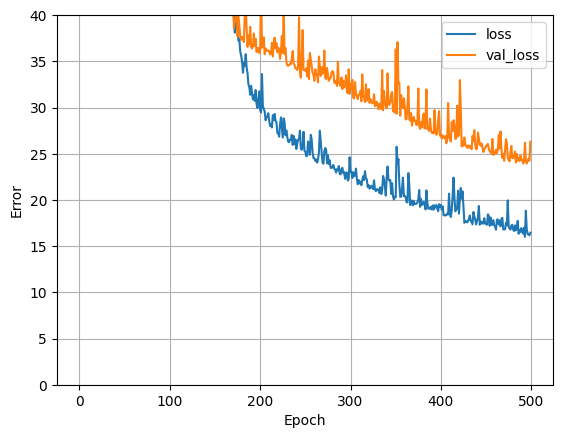

In [29]:
plot_loss(history)

In [30]:
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

normalized_model = Sequential()
normalized_model.add(normalizer)
normalized_model.add(Dense(16, activation='relu'))
normalized_model.add(Dense(1, activation='relu'))

normalized_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 14)               29        
 n)                                                              
                                                                 
 dense_8 (Dense)             (None, 16)                240       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 286
Trainable params: 257
Non-trainable params: 29
_________________________________________________________________


In [31]:
normalized_model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mse'])

normalized_history = normalized_model.fit(X_train, y_train, epochs = 500, verbose=0, validation_split = 0.2)

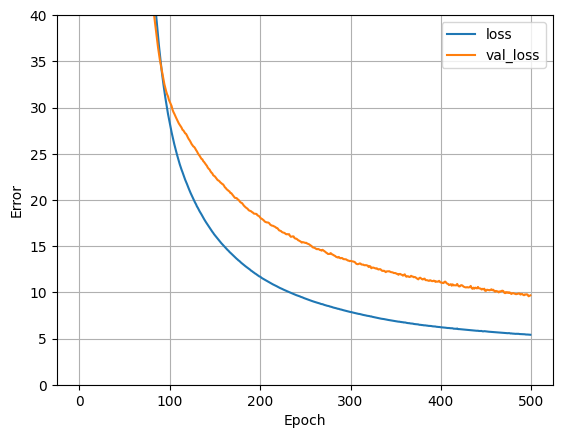

In [32]:
plot_loss(normalized_history)

4/4 [==============================] - 0s 3ms/step


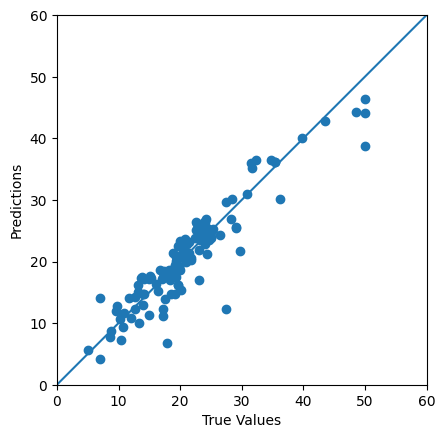

In [33]:
y_pred = normalized_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [34]:
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_pred, 'diff': y_test.values - y_pred, 'diff(abs)': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff(abs)'], ascending=False)

,y,y_pred,diff,diff(abs)
111,27.5,12.323143,15.176857,15.176857
96,50.0,38.701660,11.298340,11.298340
97,17.9,6.828101,11.071899,11.071899
15,29.8,21.658937,8.141063,8.141063
79,7.0,14.141057,-7.141057,7.141057
...,...,...,...,...
14,18.5,18.593044,-0.093044,0.093044
122,8.8,8.747434,0.052566,0.052566
6,17.8,17.753073,0.046927,0.046927
20,25.2,25.167391,0.032609,0.032609


<Axes: xlabel='diff', ylabel='Count'>

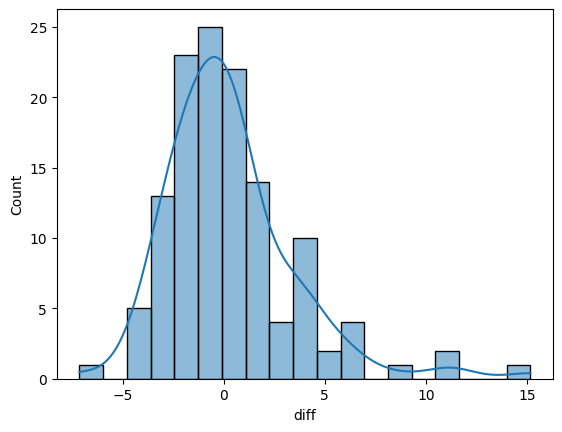

In [35]:
sns.histplot(data=result['diff'], kde = True)